<img src="images/microsoft_tenne.png" alt="tenne image" style="width: 300px;"/>

# A Vision for Microsoft Tenné 
***


**Author:** [Rebecca Frost-Brewer](https://www.linkedin.com/in/rebecca-frost-brewer/)

## Overview

This project analyzes current trends in the movie industry to establish a vision for Microsoft's new movie studio, Microsoft Tenné. Descriptive analysis of data from IMDb, The Movie Database, and Box Office Mojo provides insight into the genre of movies over the past five years (2013-2018) that have the highest audience ratings and highest gross earnings. Microsoft Tenné can use this analysis to guide their decision-making process in determining what genre of movie to produce.


## Business Problem

***

<img src="images/services.png" alt="logos" style="width: 300px;"/>

Microsoft sees many big companies creating original video content and want to establish their own movie studio to compete within the digital content market. 

To assist Microsoft in solving this problem, I will consider:

* How many movies are being made of each genre?
* What genres are the most successful, both in terms of audience rating and gross earnings?
* Of the top grossing films, which genres were most successful (had the highest gross earnings)?

Answering these questions will allow Microsoft to better decide what kind of movies to create in order to match its competitors.

***

## Data Understanding

The data for this analysis have come from:

* [The Movie Database](https://www.themoviedb.org/) (movie title, audience rating)
* [IMDb](https://www.imdb.com/) (movie title, release year, genres, and audience rating)
* [Box Office Mojo](https://www.boxofficemojo.com/) (movie title, gross earnings)

The target variables for this analysis are release year, gross earnings, genres, and audience ratings. These variables are all important and necessary to address Microsoft's business problem. Audience ratings, gross earnings, and release year are numeric variables (though gross earnings is continuous) and genres are categorical. 

The data used in this analysis has been compiled from three different platforms and includes all movies these platforms monitor. Since we are providing Microsoft with recommendations for success, we can safely assume these platforms accurately account for the movies of interest.

As we consider this data however, we should note that the data includes movies from 2010 to 2018. This is noteworthy because the data does not include the most recent three years of movie-making; since movie-watching trends can shift dramatically year to year, the conclusions and recommendations presented here may change based on more recent movies.


***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import the data from The Movie Database
tmdb_movies = pd.read_csv("data/zippedData/tmdb.movies.csv.gz", index_col = 0)
# here we specify the index column otherwise we'd have a duplicated index column

# Import the data from IMDb
imdb_title_basics = pd.read_csv("data/zippedData/imdb.title.basics.csv.gz")
imdb_title_ratings = pd.read_csv("data/zippedData/imdb.title.ratings.csv.gz")

# Import the Box Office Mojo data on the gross earnings of movies
movie_gross = pd.read_csv("data/zippedData/bom.movie_gross.csv.gz")

# Join the two IMDb files into one dataframe
imdbreviews = imdb_title_basics.join(imdb_title_ratings.set_index('tconst'),
                                   how = 'inner', on = 'tconst', rsuffix = 'r')

imdbreviews = imdbreviews.drop(columns = ['original_title', 'runtime_minutes', 'numvotes'])
# Based on the documentation from IMDb, the primary title is the more popular title,
# used by the filmmakers on promotional materials whereas the original title is the original title,
# in its original language. I decided to drop the original title since we'll be more familiar with
# the primary title

imdbreviews.rename(columns = {'primary_title':'title'}, inplace = True)
# Change the column name of the movie title to 'title', which will match our additional files

## Data Preparation

To prepare the data for analysis, I needed to combine four individual csv files into one master file. Luckily, since we're dealing with movies and movie titles, I was able to use the titles as the key for joining the dataframes.

For movies with multiple genres, I split each movie to account for each genre individually, so analysis of genre is more precise.

For the IMDb files, I did drop the 'original_title', 'runtime_minutes', and 'numvotes' columns as they are not relevant or pertinent to the business questions I am addressing.

For each of the files, I also dropped all rows that had any NaN values. I made this decision because I determined that if a movie was missing any data from these sources, that movie would not be mainstream popular nor would have gross earnings of significance and therefore could be dropped without worrying about significantly altering the analysis.

Futher, both IMDb and The Movie Database had a measure of average rating - I created a new variable that took the average of these averages, for one "master" average rating that was used in analysis. That way, the ratings from both sources are incorporated.

Lastly, I modified the gross earnings number by dividing the value by 1mil. Since the gross earnings for the movies I was analyzing are obviously more than just 1mil, I wanted the value to be more readable.

To finalize the data preparation, I created a smaller dataframe of just those movies from 2013-2018 with an average audience rating 7.0 or greater and with gross earnings greater than $27.9mil. I selected these parameters because those values represent the top 25 percent of movies based on rating and gross earnings.

***

In [3]:
# Dropping NaNs and a quick view of the IMDb Reviews dataframe
imdbreviws = imdbreviews.dropna(inplace = True)
imdbreviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 146134
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73052 non-null  object 
 1   title          73052 non-null  object 
 2   start_year     73052 non-null  int64  
 3   genres         73052 non-null  object 
 4   averagerating  73052 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [4]:
# From The Movie Database dataframe, we only want the movie title and the vote average.
tmdb_movies = tmdb_movies[['title', 'vote_average']]
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         26517 non-null  object 
 1   vote_average  26517 non-null  float64
dtypes: float64(1), object(1)
memory usage: 621.5+ KB


In [5]:
# From Box Office Mojo, we only want to keep the title and domestic gross earnings for the films
movie_gross = movie_gross[['title', 'domestic_gross']]

In [6]:
# Here, we are mutating the gross earnings per million 
movie_gross['gross_mil'] = (movie_gross['domestic_gross'])/1000000

In [7]:
# Keeping only the variables we need and dropping NaNs
movie_gross = movie_gross[['title', 'gross_mil']]
movie_gross.dropna(inplace = True)
movie_gross.describe()

,gross_mil
count,3359.000000
mean,28.745845
std,66.982498
min,0.000100
25%,0.120000
50%,1.400000
75%,27.900000
max,936.700000


In [8]:
# Preview our IMDb data
imdbreviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 146134
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73052 non-null  object 
 1   title          73052 non-null  object 
 2   start_year     73052 non-null  int64  
 3   genres         73052 non-null  object 
 4   averagerating  73052 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [9]:
# Preview our Movie Database data
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         26517 non-null  object 
 1   vote_average  26517 non-null  float64
dtypes: float64(1), object(1)
memory usage: 621.5+ KB


In [10]:
# Preview the Box Office Mojo data
movie_gross.head()

,title,gross_mil
0,Toy Story 3,415.0
1,Alice in Wonderland (2010),334.2
2,Harry Potter and the Deathly Hallows Part 1,296.0
3,Inception,292.6
4,Shrek Forever After,238.7


In [11]:
# Combining all three dataframes into one
# Since all three dataframes have the same column variable, 'title', can merge
# on 'title'
moviedf = imdbreviews.merge(tmdb_movies, on = 'title').merge(movie_gross, on = 'title')
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259 entries, 0 to 3258
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         3259 non-null   object 
 1   title          3259 non-null   object 
 2   start_year     3259 non-null   int64  
 3   genres         3259 non-null   object 
 4   averagerating  3259 non-null   float64
 5   vote_average   3259 non-null   float64
 6   gross_mil      3259 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 203.7+ KB


In [12]:
# Previewing our dataframe we have created specifically for our analysis
moviedf.head()

,tconst,title,start_year,genres,averagerating,vote_average,gross_mil
0,tt0315642,Wazir,2016,"Action,Crime,Drama",7.1,6.6,1.100
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,5.6,0.744
2,tt4339118,On the Road,2014,Drama,6.0,5.6,0.744
3,tt5647250,On the Road,2016,Drama,5.7,5.6,0.744
4,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,7.1,58.200


In [13]:
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259 entries, 0 to 3258
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         3259 non-null   object 
 1   title          3259 non-null   object 
 2   start_year     3259 non-null   int64  
 3   genres         3259 non-null   object 
 4   averagerating  3259 non-null   float64
 5   vote_average   3259 non-null   float64
 6   gross_mil      3259 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 203.7+ KB


In [14]:
# Creating an average audience rating based on ratings scores from IMDb and The Movie Database
moviedf['ratingave'] = (moviedf["averagerating"] + moviedf["vote_average"])/2
moviedf = moviedf.drop(columns = ['averagerating', 'vote_average'])
moviedf.head()

,tconst,title,start_year,genres,gross_mil,ratingave
0,tt0315642,Wazir,2016,"Action,Crime,Drama",1.100,6.85
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",0.744,5.85
2,tt4339118,On the Road,2014,Drama,0.744,5.80
3,tt5647250,On the Road,2016,Drama,0.744,5.65
4,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",58.200,7.20


In [15]:
# Creating a smaller dataframe of movies with at least a rating of 7.0 and grossed earnings of at least 3mil
moviedf_small = moviedf[(moviedf['ratingave'] >= 7) &
                        (moviedf['gross_mil'] >= 27.9) &
                        (moviedf['start_year'] > 2012)]
moviedf_small

,tconst,title,start_year,genres,gross_mil,ratingave
4,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",58.2,7.20
9,tt3079380,Spy,2015,"Action,Comedy,Crime",110.8,7.00
38,tt0451279,Wonder Woman,2017,"Action,Adventure,Fantasy",412.6,7.40
42,tt4283448,Wonder Woman,2016,"Documentary,Drama,Sport",412.6,7.10
46,tt0455944,The Equalizer,2014,"Action,Crime,Thriller",101.5,7.20
...,...,...,...,...,...,...
3198,tt6644200,A Quiet Place,2018,"Drama,Horror,Sci-Fi",188.0,7.45
3225,tt6966692,Green Book,2018,"Biography,Comedy,Drama",85.1,8.30
3242,tt7349662,BlacKkKlansman,2018,"Biography,Crime,Drama",49.3,7.55
3245,tt7401588,Instant Family,2018,"Comedy,Drama",67.4,7.50


In [33]:
# We want to split the genre column for analysis, so that each genre is on its own
moviedf_small = moviedf_small.assign(genres = moviedf_small['genres'].str.split(',')).explode('genres')
moviedf_small.head()

,tconst,title,start_year,genres,gross_mil,ratingave
4,tt0359950,The Secret Life of Walter Mitty,2013,Adventure,58.2,7.2
4,tt0359950,The Secret Life of Walter Mitty,2013,Comedy,58.2,7.2
4,tt0359950,The Secret Life of Walter Mitty,2013,Drama,58.2,7.2
9,tt3079380,Spy,2015,Action,110.8,7.0
9,tt3079380,Spy,2015,Comedy,110.8,7.0


***
## Analysis

To start exploring the data, I calculated a count of all the movies from each genre. This analysis showed that of the 218 movies in our dataset, 94 were Dramas, followed by Adventure (56) and Action (49). In other words, 43 percent of movies that grossed more than $27.9mil and rated more than 7.0 were dramas, while adventure accounts for 26 percent and action 22 percent. Of note here is that for every ten movies made, four are dramas.

With this count of genres, I was able to ascertain the average movie rating for each genre - while dramas make up 50 percent of the dataset, dramas rank 12th in average rating! The 16 musical movies and 33 sci-fi movies were the two genres with the highest aggregate average rating, 7.7 and 7.6, respectively.

Next, I calculated the average gross earnings for each genre - and again, while dramas make up 50 percent of the dataset, dramas rank 17th in average gross earnings! The top three genres with the highest average gross earnings are: Sci-Fi (251 million), Adventure (215 million), and Action (207 million).

Lastly, I created a smaller dataframe grouped by year, genre, and gross earnings only of those films that grossed more than $139.7 million (75th quartile and above) and only included the genres of note: Drama, Comedy, Musical, Sci-Fi, Action, Adventure, and Animation. From this smaller dataframe, I created a visualization faceted by year, to see the toppest grossing genres by year to determine if there are any trends we can use in addressing our business problem.



***

### Count of Movies by Genre

In [17]:
# Select only genres and title
topratings_bygenre = moviedf_small[['genres', 'title']]
topratings_bygenre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 4 to 3251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genres  569 non-null    object
 1   title   569 non-null    object
dtypes: object(2)
memory usage: 13.3+ KB


In [18]:
# Create a new dataframe with the count of movies per genre
topratings_genre = (pd.DataFrame(moviedf_small.groupby('genres', as_index = False).title.nunique())).sort_values(
    by = 'title', ascending = False)

topratings_genre

,genres,title
7,Drama,94
1,Adventure,56
0,Action,49
4,Comedy,44
3,Biography,34
5,Crime,27
16,Sci-Fi,20
18,Thriller,19
14,Mystery,15
2,Animation,15


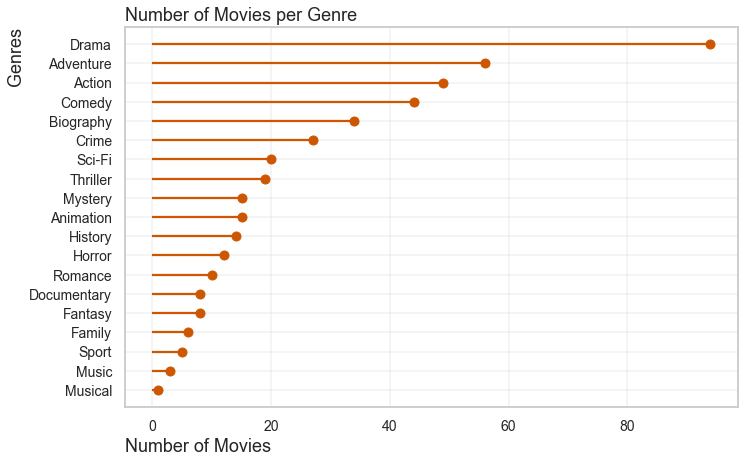

In [19]:
# Plot the number of movies per genre
plt.figure(figsize=(11, 7))
sns.set_style('whitegrid')
sns.set_context('talk', rc = {'grid.linewidth': 0.4})

# Reorder it based on the values
ordered_df = topratings_genre.sort_values(by = 'title')
my_range = range(1, len(ordered_df.index) + 1)
 
# The horizontal plot is made using the hline function
plt.hlines(y = my_range, xmin = 0, xmax = ordered_df['title'], color = '#cd5700');
plt.plot(ordered_df['title'], my_range, "o", color = '#cd5700');
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['genres'])
plt.title('Number of Movies per Genre', loc = 'left')
plt.xlabel('Number of Movies', loc = 'left')
plt.ylabel('Genres', loc = 'top')
plt.tick_params(labelsize = 14)

# Show the plot
plt.show()


Here we can visualize that the Drama genre far surpasses all other genres in terms of how many movies have been created in the 2013-2018 timeframe.

With so many Drama movies released, how do their audience ratings and gross earnings compare to other genres?

***

### Movie Genres Ranked by Average Rating

In [20]:
# Create a new dataframe with the average rating of each genre
genre_ratings = moviedf_small.groupby('genres').ratingave.agg(['count','mean']).sort_values(
    'mean', ascending = False)
genre_ratings[genre_ratings['count'] >= 5]

,count,mean
genres,,
Sci-Fi,24,7.654167
History,21,7.650000
Biography,45,7.635556
Documentary,10,7.610000
Crime,38,7.585526
Adventure,69,7.558696
Drama,130,7.549615
Animation,20,7.522500
Mystery,19,7.515789


The top three genres based on average rating are: Sci-Fi (7.65), History (7.65), and Biography (7.63). Drama's average rating ranks 7th out of 17 with a rating of 7.55.

Given the difference of just 1/10th a point between Dramas and Sci-Fis, I would not rely solely on audience rating as a measure of success. The variance between the top nine genres is so minimal as to not be significant.

***

### Movie Genres Ranked by Average Gross Earnings

In [21]:
# Create a new dataframe with average gross earnings per genre
topratings_gross = moviedf_small[['title', 'genres', 'gross_mil']]
topratings_gross = topratings_gross.groupby('genres', as_index = False).mean()
topratings_gross.sort_values('gross_mil', ascending = False, inplace = True)
topratings_gross

,genres,gross_mil
16,Sci-Fi,295.183333
2,Animation,279.745000
1,Adventure,267.039130
9,Fantasy,259.327273
0,Action,252.734426
13,Musical,174.300000
4,Comedy,162.362963
8,Family,153.237500
11,Horror,151.650000
18,Thriller,144.809091


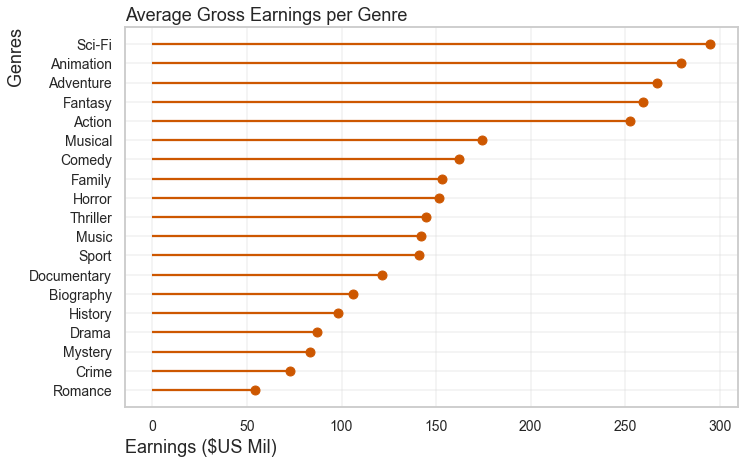

In [22]:
# Plot the number of movies per genre
plt.figure(figsize=(11, 7))
sns.set_style('whitegrid')
sns.set_context('talk', rc = {'grid.linewidth': 0.4})

# Reorder it based on the values
ordered_df = topratings_gross.sort_values(by = 'gross_mil')
my_range = range(1, len(ordered_df.index) + 1)
 
# The horizontal plot is made using the hline function
plt.hlines(y = my_range, xmin = 0, xmax = ordered_df['gross_mil'], color = '#cd5700');
plt.plot(ordered_df['gross_mil'], my_range, "o", color = '#cd5700');
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['genres'])
plt.title('Average Gross Earnings per Genre', loc = 'left')
plt.xlabel('Earnings ($US Mil)', loc = 'left')
plt.ylabel('Genres', loc = 'top')
plt.tick_params(labelsize = 14)

# Show the plot
plt.show()

Here, the top five genres with the highest average gross earnings are miles ahead of other genres. Sci

1. Sci-Fi	295mil
2. Animation	278mil
3. Adventure	267mil
4. Fantasy	259mil
5. Action	253mil

Shockingly, Dramas rank 16th out of the 19 genres in average gross earnings, averaging just 87mil.


**In the timespan of 2013-2018:**
* There were 94 Drama movies made
* Sci-Fi, History, and Biography had the highest average rating
* Sci-Fi, Animation, and Adventure had the highest average gross earnings.

***

### Genres' Gross Earnings per Movie

In [36]:
# Create a dataframe with title, genre, and gross earnings from 2013-2018
gross_sum = moviedf_small[['genres', 'gross_mil', 'start_year']]
gross_sum = gross_sum[(gross_sum['gross_mil'] > 139.7) &
                      (gross_sum['start_year'] > 2012)]

gross_sum.head()

,genres,gross_mil,start_year
38,Action,412.6,2017
38,Adventure,412.6,2017
38,Fantasy,412.6,2017
42,Documentary,412.6,2016
42,Drama,412.6,2016


In [28]:
gross_sum = gross_sum.groupby('genres', as_index = False).sum()
gross_sum['gross_bil'] = (gross_sum['gross_mil'])/1000
gross_sum.sort_values('gross_mil', ascending = False, inplace = True)
gross_sum.drop(columns = ['start_year'], inplace = True)
gross_sum

,genres,gross_mil,gross_bil
1,Adventure,17447.799999,17.4478
0,Action,13942.400000,13.9424
4,Comedy,7037.400000,7.0374
16,Sci-Fi,6461.300000,6.4613
2,Animation,5546.900000,5.5469
7,Drama,4759.900000,4.7599
3,Biography,2650.500000,2.6505
9,Fantasy,2631.699999,2.6317
18,Thriller,2041.100000,2.0411
11,Horror,1438.400000,1.4384


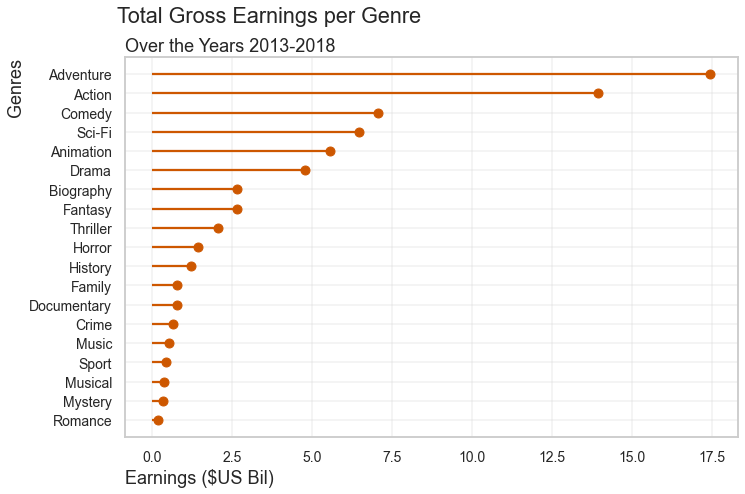

In [29]:
# Plot the number of movies per genre
plt.figure(figsize=(11, 7))
sns.set_style('whitegrid')
sns.set_context('talk', rc = {'grid.linewidth': 0.4})

# Reorder it based on the values
ordered_df = gross_sum.sort_values(by = 'gross_bil')
my_range = range(1, len(ordered_df.index) + 1)
 
# The horizontal plot is made using the hline function
plt.hlines(y = my_range, xmin = 0, xmax = ordered_df['gross_bil'], color = '#cd5700');
plt.plot(ordered_df['gross_bil'], my_range, "o", color = '#cd5700');
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['genres'])
plt.suptitle('Total Gross Earnings per Genre', horizontalalignment = 'right')
plt.title('Over the Years 2013-2018', loc = 'left')
plt.xlabel('Earnings ($US Bil)', loc = 'left')
plt.ylabel('Genres', loc = 'top')
plt.tick_params(labelsize = 14)

# Show the plot
plt.show()

Over the five-year span of 2013-2018, Adventure and Action's gross earnings summed 17.4 and 13.9 billion dollars, respectively.

***

## Evaluation


The stated business problem presented by Microsoft is establishing their own movie studio to compete within the movie market, and needing to know what kind of movies will be the most successful.

This analysis solves the stated business problem by determining what kind of movies have been the most successful - in audience rating, average gross earnings, and total gross earnings over five years - between 2013-2018. In utilizing three large datasets from industry-standard giants of IMDb, The Movie Database, and Box Office Mojo, the data is comprehensive and trustworthy.

**This analysis of movies from 2013-2018 shows the following:**

* There were 94 Drama movies made
* Sci-Fi, History, and Biography had the highest average rating
* Sci-Fi, Animation, Adventure, Fantasy, and Action all averaged more than 250 million dollars per movie
* Adventure and Action had the highest total gross earnings, 17.4 billion and 13.9 billion, respectively


For mainstream, blockbuster movies, the data and results presented here will generalize well for the purpose of informing the vision of Microsoft Tenné. Should Microsoft Tenné decide to focus on more niche markets, we would need additional data from other sources to better provide more insight.

***

## Conclusions

This analysis leads to three recommendations of what movies to produce for Microsoft's new movie studo, Tenné.

* **For successful, sustained gross earnings over time, Tenné should produce Adventure and Action.** These two genres have demonstrated consistent success over five years in amassing the most amount of gross earnings.
<br>

* **For immediately successful gross earnings, Tenné should produce movies that are Sci-Fi, Animation, Adventure, Fantasy, or Action**. These five genres all average at least 250 million dollars per film.
<br>

* **Create Sci-Fi movies**. Between 2013 and 2018, 218 movies were produced, and only **20** of those movies were Sci-Fi. Knowing that Sci-Fi movies do well in average gross earnings per movie **and** that the market is not overly saturated with Sci-Fi movies, this genre would be the most likely an immediate impact on the success of Microsoft Tenné.


***

## Next Steps

Further analyses could yield additional insights to further improve Microsoft Tenné's decision-making protocol in determining what genre of movie to create.

* **Analyze more recent data from 2019-2021.** One, this would provide more current data, and two, this would incorporate the changes in viewing practices as a result of the Covid-19 pandemic. Throughout the pandemic, more people watched movies from home and movie studios did direct-to-stream releases. Pulling data from streaming services on number of streams will be highly informative in terms of what people have been watching.
* **Analyze streaming data.** As mentioned above, using data to compare ratings and earnings of traditional theatre-released movies vs. ratings and number of streams of released-to-streaming platforms will be critical as Microsoft enters the field. Are traditional theatre-released movies the most successful?
* **Analyze demographics of movie-makers and movie-watchers.** Could Microsoft become a leader in creating films by and for marginalized and underrepresented populations within the film industry - women, people of color, women of color, LGBTQIA people, multilingual films? Given the success of Black Panther, Parasite, and Roma (as just a few examples), is there a case to be made for Microsoft becoming the home for diverse movies?